<div style="border:solid green 2px; padding: 20px">

<b>Привет, Дарья!</b>

Меня зовут Алина Соловьева и я буду проверять твою работу. Попробую помочь сделать тебе её еще лучше! В Практикуме принято общени на ты, но если это дискомфортно, то сообщи об этом)

Ниже ты найдешь мои комментарии - пожалуйста, не перемещай, не изменяй и не удаляй их. Я буду использовать цветовую разметку:

<div class="alert alert-danger">
<b>Комментарий ревьюера:</b>☁️Так выделены самые важные замечания. Без их отработки проект не будет принят. </div>

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>⛅️ Так выделены небольшие замечания.Такие замечания в проекте допустимы, это пространство для улучшений в будущем.
</div>

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️Так я выделяю успешные идеи.</div>

Давай работать над проектом в диалоге: если ты что-то меняешь в проекте или отвечаешь на мои комменатри — пиши об этом. Мне будет легче отследить изменения, если ты выделишь свои комментарии:
<div class="alert alert-info"> <b>Комментарий студента:</b> Например, вот так.</div>

Всё это поможет выполнить повторную проверку твоего проекта оперативнее.

# Анализ оттока клиентов банка

**Презентация:** https://disk.yandex.ru/i/XjR_p8t46EM5mw

**Цель проекта:** анализ оттока клиентов и сегментирование пользователей, которые склонны уходить из банка.

В нашем распоряжении датасет с данными о клиентах банка «Метанпром». Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск. 

**В ходе проекта необходимо:**
1. Провести предобработку и исследовательский анализ данных.
2. Определить признаки, которые сильнее всего влияют на отток.
3. Провести корреляционный анализ метрик с признаком оттока.
4. Проверить гипотезы
5. Провести сегментирование пользователей, проверить соответствие сегментов требованиям и дать рекомендации по работе с клиентами для каждого сегмента.

Датасет `bank_scrooge.csv` сожержит:
- `USERID` — идентификатор пользователя;
- `score` — баллы кредитного скоринга;
- `city` — город;
- `gender` — пол;
- `age` — возраст;
- `equity` — количество баллов собственности;
- `balance` — баланс на счете;
- `products` — количество продуктов, которыми пользуется клиент;
- `credit_card` — есть ли кредитная карта;
- `last_activity` — активный клиент;
- `EST_SALARY` — оценочный доход клиента;
- `сhurn` — признак оттока.

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️Хорошо, что есть введение - это важная часть проекта.</div>

In [1]:
# Импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import numpy as np
from scipy import stats as st

## Загрузка данных и подготовка к анализу

### Загрузка данных

In [2]:
# Загрузим датасет из файла
bank_clients = pd.read_csv('/datasets/bank_scrooge.csv')

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>☀️В будущем для подгрузки данных рекомендую использовать конструкцию try-except или os.path, так удобнее работать с файлом локально.</div>

In [3]:
# Напишем функцию, выводящую первые пять строк датафрейма и общую информацию о нем
def df_info(df, df_name):
    display(df.head(5))
    print()
    print('\033[1m' + f"Информация для датафрейма '{df_name}':" + '\033[0m')
    df.info()
    print()
    display(df.describe().round(2))

In [4]:
# Выведем на экран первые пять строк датафрейма и общую информацию о нем
df_info(bank_clients, 'bank_clients')

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1



Информация для датафрейма 'bank_clients':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB



,USERID,score,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
count,10000.00,10000.00,9974.00,10000.00,7.705000e+03,10000.00,10000.00,10000.00,10000.00,10000.00
mean,171814.71,848.70,42.73,2.63,8.277943e+05,1.87,0.68,0.52,147866.89,0.18
std,33708.24,65.45,12.18,1.98,1.980614e+06,0.79,0.47,0.50,139388.51,0.39
min,94561.00,642.00,18.00,0.00,0.000000e+00,0.00,0.00,0.00,2546.30,0.00
25%,142810.25,802.00,33.00,0.00,2.955542e+05,1.00,0.00,0.00,75251.90,0.00
50%,172728.00,853.00,40.00,3.00,5.242722e+05,2.00,1.00,1.00,119658.10,0.00
75%,201261.75,900.00,51.00,4.00,9.807058e+05,2.00,1.00,1.00,174500.54,0.00
max,229145.00,1000.00,86.00,9.00,1.191136e+08,5.00,1.00,1.00,1395064.45,1.00


Мы ознакомились с таблицей. В загруженном датафрейме `bank_clients` 12 столбцов и 10000 строк. Исходя из информации, выведенной выше, можем заметить, что имена столбцов заданы не корректно, в некоторых столбцах есть пропуски.

Столбцам `score` и `age` больше подходит тип данных int, так как возраст клиента не может быть дробным, а значения кредитного рейтинга целые числа.

Перейдем к предобработке данных.

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️Отличный первичный взгляд на данные.</div>

### Предобработка данных

#### Работа с названиями столбцов

In [5]:
# Переименуем столбцы датафрейма в соответствии с принятыми правилами названия
bank_clients.columns = bank_clients.columns.str.lower()

# Разделим слова в названии столбца `userid` нижним подчеркиванием
bank_clients = bank_clients.rename(columns={
    'userid': 'user_id'
})

# Проверим, все ли получилось
print(bank_clients.columns)

Index(['user_id', 'score', 'city', 'gender', 'age', 'equity', 'balance',
       'products', 'credit_card', 'last_activity', 'est_salary', 'churn'],
      dtype='object')


Столбцы переименованы в соответствии с устоявшимися правилами.

#### Работа с типами данных

Чтобы изменить тип данных столбца `age`, сначала выведем на экран уникальные значения столбца и количество пропусков. 

In [6]:
# Выведем на экран уникальные значения столбца `age` и суммарное количество пропусков
print(f"Уникальные значения столбца 'age': {bank_clients['age'].unique()}")
print()
print(f"Количество пропусков в столбце 'age': {bank_clients['age'].isna().sum()}")

Уникальные значения столбца 'age': [25. 37. 30. 51. 34. 56. 39. 38. 54. 67. 52. 41. 31. 28. 35. 42. 45. 53.
 40. 43. 47. 48. 61. 62. 36. 26. 27. 60. 72. 50. 46. 55. 58. 71. 44. 49.
 33. 32. 66. 29. 68. 73. 69. 59. 21. 65. 57. 63. 80. 24. 70. 77. 64. 23.
 20. 18. 19. 78. 74. 76. 22. 75. nan 83. 82. 81. 84. 79. 86.]

Количество пропусков в столбце 'age': 26


В столбце `age` 26 пропусков. Возможно, при создании договора с клиентом, данные были заполнены некорректно или, при выгрузке из базы данных, возникла техническая ошибка, и данные выгрузились не полностью. Так как пропусков немного, удалим их, и изменим тип данных на целочисленный.

In [7]:
# Заполним пропуски в столбце `age` на 0 и изменим тип данных на целочисленный int
# bank_clients['age'] = bank_clients['age'].fillna(0).astype(int)

# Удалим пропуски в столбце `age` и изменим тип данных на целочисленный int
bank_clients = bank_clients.dropna(subset=['age'])
bank_clients['age'] = bank_clients['age'].astype(int)

# В столбце `score` нет пропусков, поэтому изменение типов данных пройдет без ошибок
bank_clients['score'] = bank_clients['score'].astype(int)

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>☀️Вообще говоря эти пропуски нужно удалить, т.к. их немного.</div>

<div class="alert alert-info"> 
<b>Комментарий студента:</b> 
    
Хорошо! Пропуски удалила, прошлый код с заменой на ноль закомментировала. Это привело к ряду изменений в работе:
- Везде, где в выводах упоминала замену пропусков в этом столбце, исправила на то, что мы их удалили.
- Все изменившиеся цифры и доли (хоть и незначительно) в выводах по всей работе поменяла. 
- В поиске дубликатов по `user_id` в сочетании со столбцами `score`, `balance` и `est_salary` больше дубликатов не найдено. Я выводы подправила, но удалять совсем эти проверки не стала. 

</div>


<div class="alert alert-success">
<b>Комментарий ревьюера v2.0:</b>☀️Супер!!</div>

#### Работа с пропусками

In [8]:
# Выведем на экран количество пропусков в каждом столбце
print(bank_clients.isna().sum())

user_id             0
score               0
city                0
gender              0
age                 0
equity              0
balance          2279
products            0
credit_card         0
last_activity       0
est_salary          0
churn               0
dtype: int64


В предыдущем шаге мы удалили пропуски в столбце `age`, т.к. их немного и это не повлияет на результат дальнейшего исследования.

Осталось 2279 пропусков в столбце `balance`, это почти 23% от всех данных, удалять их точно нельзя. Возможно, пропуск в данных - это нулевой баланс на счете клиента. Проверим, есть ли в данных этого столбца нулевой баланс.

In [9]:
# Отсортируем данные столбца `balance` по возрастанию
print(bank_clients['balance'].sort_values())

3900     0.0
6757     0.0
6164     6.0
3918     7.0
2876    20.0
        ... 
9976     NaN
9984     NaN
9993     NaN
9996     NaN
9997     NaN
Name: balance, Length: 9974, dtype: float64


Два клиента имеют нулевой баланс, далее мы видим клиентов с 6 у.е. и больше. Значит эти пропуски не означают, что на счету клиента нулевой баланс. Рассмотрим пропуски в разрезе других параметров, характеризующих клиента.

In [10]:
# Выведем на экран таблицу с описанием всех столбцов, где пропущены знаечния в столбце `balance`, 
# округлим значения до трех знаков после запятой
display(bank_clients.loc[bank_clients['balance'].isna()].describe().round(3))

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn
count,2279.000,2279.000,2279.000,2279.000,0.0,2279.000,2279.000,2279.000,2279.000,2279.000
mean,171904.886,865.357,42.093,0.051,NaN,1.163,0.815,0.549,226345.417,0.006
std,33303.215,89.554,11.942,0.227,NaN,0.404,0.388,0.498,199825.591,0.075
min,114182.000,642.000,18.000,0.000,NaN,0.000,0.000,0.000,20274.030,0.000
25%,142992.500,871.000,33.000,0.000,NaN,1.000,1.000,0.000,120217.385,0.000
50%,172304.000,903.000,40.000,0.000,NaN,1.000,1.000,1.000,174347.870,0.000
75%,201257.000,922.000,49.000,0.000,NaN,1.000,1.000,1.000,240372.775,0.000
max,229145.000,990.000,86.000,3.000,NaN,3.000,1.000,1.000,1333687.360,1.000


Из таблицы выше видно, что пропуски в столбце `balance` имеют клиенты с низким уровнем оценки стоимости имущества (почти всегда это 0), в основном имеющие один продукт от банка и в большинстве случаев это кредитная карта. Почти все клиенты с пропусками в столбце `balance` не собираются уходить из банка.

Эти пропуски мы оставим без изменений, потому что они составляют большую долю данных, которую удалять определенно точно нельзя. Но и заменить их нечем, т.к., в рамках проекта, это невосполнимая информация, а происхождение этих пропусков остается неизвестным.

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️Хороший анализ пропусков!</div>

#### Работа с дубликатами

In [11]:
# Напишем функцию, выводящую информацию о дубикатах
def duplicates(df, df_name):
    # Проверим явные дубликаты
    print('\033[1m' + f"Количество явных дубликатов в таблице '{df_name}':" + '\033[0m')
    print(f'{df.duplicated().sum()}')
    print()
    
    # Для проверки неявных дубликатов, выведем уникальные значения всех столбцов заданного датафрейма
    for column in df:
        print('\033[1m' + f'Количества уникальных значений для столбца {column}:' + '\033[0m')
        print(df[column].value_counts())
        print()

In [12]:
# Проверим наличие дубликатов в датафрейме `bank_clients`
duplicates(bank_clients, 'bank_clients')

Количество явных дубликатов в таблице 'bank_clients':
0

Количества уникальных значений для столбца user_id:
120258    2
217643    2
199312    2
170312    2
200863    2
         ..
181682    1
179637    1
173494    1
175543    1
215039    1
Name: user_id, Length: 9924, dtype: int64

Количества уникальных значений для столбца score:
900    80
889    75
899    70
894    69
912    68
       ..
666     1
667     1
995     1
998     1
671     1
Name: score, Length: 348, dtype: int64

Количества уникальных значений для столбца city:
Ярославль    5875
Рыбинск      2683
Ростов       1416
Name: city, dtype: int64

Количества уникальных значений для столбца gender:
М    4991
Ж    4983
Name: gender, dtype: int64

Количества уникальных значений для столбца age:
36    414
37    402
33    392
35    388
34    384
     ... 
83      3
84      2
86      2
82      2
79      2
Name: age, Length: 68, dtype: int64

Количества уникальных значений для столбца equity:
0    2576
5    1915
4    1847
3    1541
2 

Явных дубликатов в датафрейме не найдено. 

Однако мы видим, что есть дубликаты в столбце `user_id`, которых быть явно не должно, т.к. в `user_id` хранятся уникальные id пользователей. В столбце `products` мы видим, что у одного из клиентов количество продуктов банка равно нулю. Это явная аномалия. Также есть четыре двойных повторения значений в столбце `est_salary`, однако зарплата клиентов может совпадать. Рассмотрим эти данные более подробно.

In [13]:
# Сделаем так, чтобы выводились все строки
pd.set_option('display.max_rows', None)

# Выведем на экран строки датафрейма `bank_clients` с дубликатами в столбце `user_id`, с сортировкой также по этому столбцу
display(bank_clients.loc[bank_clients['user_id'].duplicated(keep=False)].sort_values(by='user_id'))

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1893,116540,883,Рыбинск,Ж,55,1,362756.49,3,0,1,175920.48,1
7694,116540,887,Ярославль,Ж,38,0,NaN,1,0,1,119247.61,0
4866,117943,855,Рыбинск,Ж,32,6,1036832.93,4,1,1,107792.71,1
7542,117943,880,Ярославль,Ж,40,0,NaN,1,1,0,137718.93,0
5863,120258,908,Рыбинск,Ж,38,4,2213581.63,2,0,1,160327.77,1
5896,120258,905,Ярославль,М,30,0,NaN,1,1,1,146427.96,0
1411,123461,829,Ярославль,Ж,59,0,96222.44,2,0,1,102771.55,1
8638,123461,934,Рыбинск,М,34,0,NaN,2,1,0,291619.27,0
9775,124450,758,Рыбинск,Ж,36,0,73574.07,2,0,1,79963.59,0
8164,124450,859,Ярославль,Ж,38,6,516811.20,1,1,1,95144.63,1


Почти всегда под одним `user_id` скрывается два абсолютно разных пользователя: с разным полом, возрастом, балансом, зарплатой и остальными параметрами. Однако сразу заметно, что в рамках одного `user_id`, в паре всегда присутствуют два разных города (Ярославь и Рыбинск). Возможно, это были разные базы данных двух городов, при соединении которых некоторые `user_id` задублировались.

Однако рассмотрим дубликаты в столбеце `user_id` в сочетании с другими параметрами, совпадение с которыми было бы большой редкостью: `score`, `balance` и `est_salary`.

In [14]:
# Выведем на экран строки датафрейма `bank_clients` с дубликатами в столбцах `user_id` и `score`
display(bank_clients.loc[bank_clients[['user_id', 'score']].duplicated(keep=False)].sort_values(by='user_id'))

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn


In [15]:
# Выведем на экран строки датафрейма `bank_clients` с дубликатами в столбцах `user_id` и `balance`
display(bank_clients.loc[bank_clients[['user_id', 'balance']].duplicated(keep=False)].sort_values(by='user_id'))

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn


In [16]:
# Выведем на экран строки датафрейма `bank_clients` с дубликатами в столбцах `user_id` и `est_salary`
display(bank_clients.loc[bank_clients[['user_id', 'est_salary']].duplicated(keep=False)].sort_values(by='user_id'))

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn


Критически редких и неправдоподобных совпадений по `user_id` найдено не было, все клинеты - разные люди. Скорее всего, при выгрузке из базы данных был сбой. Эти строки оставляем без изменений.

Однако, мы также хотели рассмотреть более подробно несколько совпадений по столбцу `est_salary`. 

In [17]:
# Выведем на экран строки датафрейма `bank_clients` с дубликатами в столбце `est_salary`, с сортировкой также по этому столбцу
display(bank_clients.loc[bank_clients['est_salary'].duplicated(keep=False)].sort_values(by='est_salary'))

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
513,120675,832,Рыбинск,Ж,37,2,430220.82,2,1,1,49742.87,0
2442,152240,861,Ростов,Ж,60,3,599546.80,2,0,1,49742.87,0
4642,133759,831,Ярославль,М,50,5,560145.71,2,1,1,108250.17,0
6050,202056,979,Рыбинск,Ж,30,2,820572.71,3,1,0,108250.17,0
884,214629,772,Ярославль,М,53,2,335295.37,2,1,1,176348.18,0
8376,217828,947,Ярославль,М,30,5,393215.11,1,1,0,176348.18,0


Из таблицы видно, что неявные дубликаты по зарплате, как и предполагалось, это просто совпадения, их имеют совершенно разные клиенты.

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️Тут все супер!</div>

#### Работа с аномалиями
В предыдущем шаге при поиске дубликатов мы обнаружили одного клиента с нулевым количеством продуктов. Рассмотрим эту строку.

In [18]:
# Выведем на экран строку с нулем в столбце `products`
display(bank_clients.query('products == 0'))

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
8957,147837,962,Рыбинск,Ж,79,3,NaN,0,0,0,25063.96,1


Это явная аномалия, этот клиент помечен как отточный, возможно он уже ушел, но по какой-то технической причине остался в базе данных. Принимаем решение о ее удалении, т.к. на общие результаты удаление этой строки повлияет незначительно.

In [19]:
# Удалим строку клиента с нулем в столбце `products`
# bank_clients.drop(8957, inplace=True)
bank_clients = bank_clients.query('products != 0')

<div class="alert alert-danger">
<b>Комментарий ревьюера:</b>В коде не должно быть чисел, введенных вручную.</div>

<div class="alert alert-info"> 
<b>Комментарий студента:</b> Исправила! Предыдущий код закомментировала

</div>


<div class="alert alert-success">
<b>Комментарий ревьюера v2.0:</b>☀️Есть!</div>

Рассмотрим также столбцы `balance` и `est_salary` на предмет выбросов. 

count         7695.00
mean        827245.59
std        1980327.41
min              0.00
25%         295698.71
50%         524295.33
75%         980051.21
max      119113552.01
Name: balance, dtype: object

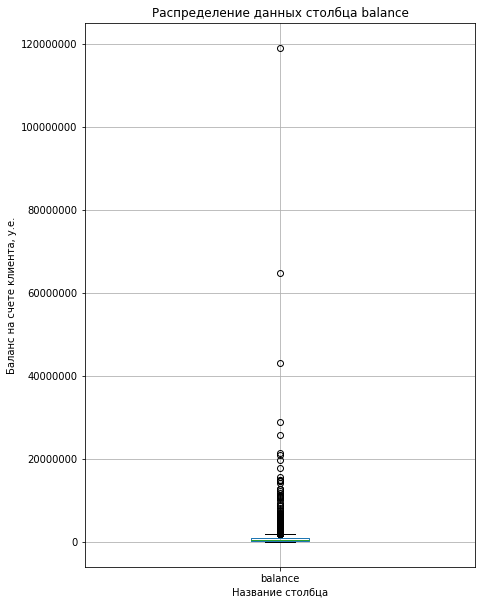

In [20]:
# Выведем на экран описание данных столбца `balance`
display(bank_clients['balance'].describe().apply(lambda x: f'{float(x):.2f}'))

# Зададим размер графика
plt.figure(figsize=(7,10))

# Настроим формат оси Y
formatter = ticker.ScalarFormatter(useMathText=False)
formatter.set_scientific(False)
plt.gca().yaxis.set_major_formatter(formatter)

# Построим диаграмму размаха для параметра `balance`
bank_clients.boxplot('balance')
plt.title(f"Распределение данных столбца balance")
plt.xlabel(f"Название столбца")
plt.ylabel(f"Баланс на счете клиента, у.е.")
plt.show()

<div class="alert alert-danger">
<b>Комментарий ревьюера:</b>Все графики в проекте должны быть ясны вне контекста. Нужно подписать оси + заголовок. Если исследование проводится на русском языке, то и оси должны быть названы на русском. Пожалуйста, исправь это везде по проекту, где требуется.</div>

<div class="alert alert-info"> 
<b>Комментарий студента:</b> Поняла! Везде, где встречается, исправила.

</div>


<div class="alert alert-success">
<b>Комментарий ревьюера v2.0:</b>☀️Спасибо за исправления, внесенные в графики!</div>

Мы видим запредельно аномальные значения баланса: около 119, 65, 43 млн. у.е.. Такой баланс на счету нескольких клиентов банка возможен и реален (например, кто-то только что продал квартиру или машину, кто-то мог долго копить), удалять эти значения мы не будем.

В основном же данные располагаются в диапазоне до 2 млн. у.е. Медианный баланс клиентов - 524 295 у.е.

count       9973.00
mean      147799.12
std       139287.08
min         2546.30
25%        75252.02
50%       119643.06
75%       174499.96
max      1395064.45
Name: est_salary, dtype: object

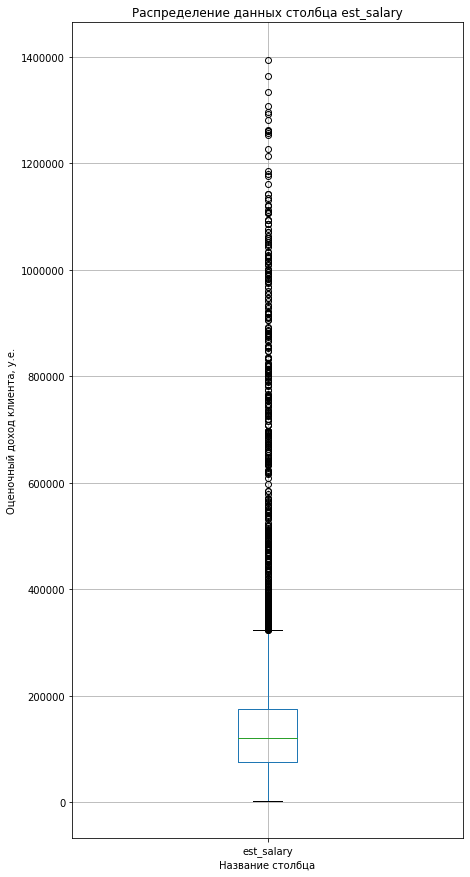

In [21]:
# Выведем на экран описание данных столбца `est_salary`
display(bank_clients['est_salary'].describe().apply(lambda x: f'{float(x):.2f}'))

# Зададим размер графика
plt.figure(figsize=(7,15))

# Настроим формат оси Y
formatter = ticker.ScalarFormatter(useMathText=False)
formatter.set_scientific(False)
plt.gca().yaxis.set_major_formatter(formatter)

# Построим диаграмму размаха для параметра `est_salary`
bank_clients.boxplot('est_salary')
plt.title(f"Распределение данных столбца est_salary")
plt.xlabel(f"Название столбца")
plt.ylabel(f"Оценочный доход клиента, у.е.")
plt.show()

Максимальная зарплата почти 1,4 млн. у.е. Мы видим большое количество выбросов, однако они тоже вполне реальны и не требуют удаления. В основном клиенты имеют доход до 330 тыс. у.е. Медианное значение зарплаты клиентов - почти 120 тыс. у.е. Минимальный доход клиента составляет 2546 у.е.

#### Преобразование категориальных переменных в столбцах `city` и `gender`
Для того, чтобы можно было смотреть корреляции и применять среднее по столбцам с неупорядоченными категориальными данными, используем метод pd.get_dummies() и преобразуем категориальные переменные в фиктивные переменные. Метод возвращает новый датафрейм с двоичными столбцами для отдельных значений, присутствующих в исходных данных. 

1 - наличие этого значения, 0 — отсутствие.

In [22]:
# Создадим копии столбцов `city` и `gender`
bank_clients['city_new'] = bank_clients['city']
bank_clients['gender_new'] = bank_clients['gender']

# Используем метод get_dummies() для преобразования категориальных переменных в новых столбцах
bank_clients = pd.get_dummies(bank_clients, columns=['city_new', 'gender_new'])

# Переименуем полученные столбцы
bank_clients = bank_clients.rename(columns={
    'city_new_Ростов': 'city_rostov',
    'city_new_Рыбинск': 'city_rybinsk',
    'city_new_Ярославль': 'city_yaroslavl',
    'gender_new_Ж': 'gender_female',
    'gender_new_М': 'gender_male'
})

# Выведем на экран первые пять строк полученного датафрейма
bank_clients.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,city_rostov,city_rybinsk,city_yaroslavl,gender_female,gender_male
0,183012,850,Рыбинск,Ж,25,1,59214.82,2,0,1,75719.14,1,0,1,0,1,0
1,146556,861,Рыбинск,Ж,37,5,850594.33,3,1,0,86621.77,0,0,1,0,1,0
2,120722,892,Рыбинск,Ж,30,0,NaN,1,1,1,107683.34,0,0,1,0,1,0
3,225363,866,Ярославль,Ж,51,5,1524746.26,2,0,1,174423.53,1,0,0,1,1,0
4,157978,730,Ярославль,М,34,5,174.00,1,1,0,67353.16,1,0,0,1,0,1


Новый датафрейм с двоичными столбцами `city_rostov`, `city_rybinsk`, `city_yaroslavl`, `gender_female`, `gender_male` успешно получен. При этом старые столбцы `city` и `gender` также сохранены.

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️Новые столбцы добавлены корректно.
</div>

#### Вывод по разделу
В ходе предобработки данных:
- Столбцы были переименованы в соответствии с устоявшимися правилами.
- В столбце `age` было надено 26 пропусков, они были удалены, т.к. их немного.
- Тип данных столбцов `score` и `age` заменили на целочисленный.
- В столбце `balance` было надено 2279 пропусков, они были оставлены без изменений, т.к. они составляют почти 23% всех данных, это весомая часть. Мы рассмотрели их в совокупности с другими характеристиками, пришли к выводу, что пропуски имеют клиенты с низким уровнем оценки стоимости имущества (почти всегда это 0), в основном имеющие один продукт от банка и в большинстве случаев это кредитная карта. Почти все клиенты с пропусками в столбце `balance` не собираются уходить из банка. Обработать эти пропуски не представляется возможным, т.к., в рамках проекта, это невосполнимая информация.
- Явных дубликатов в датафрейме не найдено.
- В столбце `user_id`, несмотря на то, что там хранятся уникальные id пользователей, были найдены неявные дубликаты. При более подробном рассмотрении в сочетании с другими параметрами, критически редких и неправдоподобных совпадений найдено не было, все клинеты - разные люди. Вероятнее всего, при выгрузке из базы данных был сбой. Эти строки оставили без изменений.
- В столбце `est_salary` также было найдено три пары клиентов с одинаковой зарлпатой, однако было выявлено, что это просто совпадения, их имеют совершенно разные клиенты.
- В столбце `products` обнаружили у одного из клиентов количество продуктов банка равно нулю. Эта строка была удалена.
- Рассмотрели аномалии в столбцах `balance` и `est_salary`. Приняли решение оставить их.
- Для дальнейшего корреляционного анализа для столбцов `city` и `gender` был применен метод, создающий датафрейм с двоичными столбцами для отдельных значений, присутствующих в исходных данных.

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️В целом, по предобработке все хорошо. Можно приступать к исследовательскому анализу данных.</div>

## Исследовательский анализ данных
Найдем признаки, которые сильнее всего влияют на отток. Исследуем общее количество клиентов, число отточных клиентов и их соотношение по каждому параметру с визуализацией.

### Анализ влияния метрики score на отток клиентов

In [23]:
# Напишем функцию, выводящую гистограмму с соотношением отточных и лояльных клиентов по параметру category_name
def df_category_name_hist(df, category_name, graph_name):
    
    # Зададим размер датафрейма и построим гистограмму с соотношением отточных и лояльных клиентов по category_name
    plt.figure(figsize=(15,7))
    sns.histplot(data=df, x=category_name, hue='churn', bins=80, alpha=0.4, common_norm=False, stat='density')
    
    # Зададим остальные натсройки графика
    plt.title(f"Гистограмма с соотношением отточных и лояльных клиентов по {category_name}")
    plt.xlabel(f"{graph_name}")
    plt.ylabel(f"Плотность")
    plt.grid(axis='y')
    
    # Задаем диапазон и шаг подписей значений оси X
    x_min = df[category_name].min()
    x_max = df[category_name].max()
    step = round((x_max - x_min) / 20, 0)
    plt.xticks(np.arange(x_min, x_max + step, step))
    
    # Выведем полученную гистограмму на экран
    plt.show()

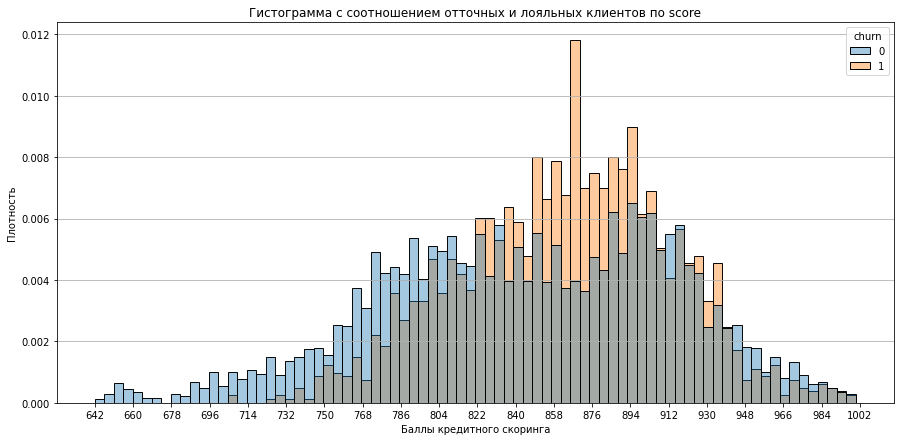

In [24]:
# Вызовем функицю df_category_name_hist для параметра `score`
df_category_name_hist(bank_clients, 'score', 'Баллы кредитного скоринга')

По полученой гистограмме видим, что клиенты с баллами кредитного скоринга в диапазоне от 840 до 900 имеют высокий отток. Рассмотрим диапазон этих клиентов более детально.

In [25]:
# Напишем функцию, выводящую общую информацию о полученном срезе
def query_info(df):
    print(f"Всего клиентов в срезе: {df['churn'].count()}")
    print(f"Количество отточных клиентов в срезе: {df['churn'].sum()}")
    print(f"Количество лояльных клиентов в срезе: {df['churn'].count() - df['churn'].sum()}")
    print(f"Доля отточных клиентов в срезе: {round(df['churn'].sum()/df['churn'].count()*100, 2)}%")
    print(f"Доля клиентов в срезе от общего числа клиентов банка: {round(df['churn'].count()/bank_clients['user_id'].count()*100, 2)}%")

In [26]:
# Создадим срез, в который попадут клиенты с кредитным рейтингом от 840 до 900
bank_clinets_score_840_900 = bank_clients.query('840 <= score <= 900')

# Выведем информацию о срезе с клиентами с кредитным рейтингом от 840 до 900
query_info(bank_clinets_score_840_900)

Всего клиентов в срезе: 3195
Количество отточных клиентов в срезе: 821
Количество лояльных клиентов в срезе: 2374
Доля отточных клиентов в срезе: 25.7%
Доля клиентов в срезе от общего числа клиентов банка: 32.04%


Доля отточных клиентов с кредитным скорингом 840-900 составляет 25.7%, что выше, чем средний рейтинг оттока по банку. Доля клиентов этой категории от общего числа клиентов банка существенная и составляет 32.04%.

### Анализ влияния города проживания на отток клиентов

In [27]:
# Напишем функцию, выводящую срез по заданному параметру category_name с общим числом клиентов, 
# количеством отточных и лояльных клиентов и долей отточных клиентов от общего числа
def df_category_counts(df, category_name, graph_name):
    
    category_name_counts = df.pivot_table(index=category_name, values='churn', aggfunc=['count', 'sum']).sort_values(by=category_name).reset_index()
    category_name_counts.columns = [category_name, 'total', 'churn']
    category_name_counts['loyal'] = category_name_counts['total'] - category_name_counts['churn']
    category_name_counts['total_ratio'] = round(category_name_counts['total'] / df['user_id'].count() * 100, 2)
    category_name_counts['churn_ratio'] = round(category_name_counts['churn'] / category_name_counts['total'] * 100, 2)
    display(category_name_counts)
    
    # Построим диаграмму с отточных и лояльных клиентов по category_name
    category_name_counts.plot(x=category_name, y=['churn', 'loyal'], kind='bar', figsize=(10, 7))
    
    # Зададим остальные натсройки графика и выведем на экран
    plt.title(f"Количество отточных и лояльных клиентов по {category_name}")
    plt.ylabel(f"Количество клиентов")
    plt.xlabel(f"{graph_name}")
    plt.xticks(rotation=30)
    plt.grid()
    plt.show()

    # Построим диаграмму с долей отточных клиентов от общего числа клиентов категории по category_name
    category_name_counts.plot(x=category_name, y='churn_ratio', kind='bar', figsize=(10, 7), legend=False)
    
    # Зададим линию среднего уровня оттока
    plt.axhline(y=bank_clients['churn'].mean()*100, color='red', linestyle='--')
    
    # Зададим остальные натсройки графика и выведем на экран
    plt.title(f"Доля отточных клиентов по {category_name}")
    plt.ylabel(f"Процент отточных клиентов, %")
    plt.xlabel(f"{graph_name}")
    plt.xticks(rotation=30)
    plt.grid()
    plt.show()

,city,total,churn,loyal,total_ratio,churn_ratio
0,Ростов,1416,265,1151,14.20,18.71
1,Рыбинск,2682,436,2246,26.89,16.26
2,Ярославль,5875,1117,4758,58.91,19.01


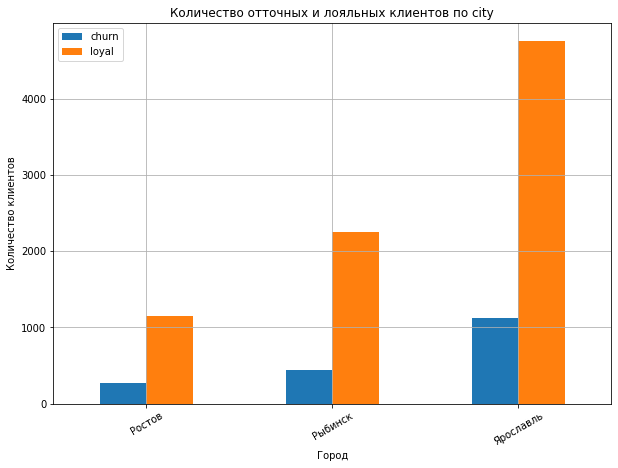

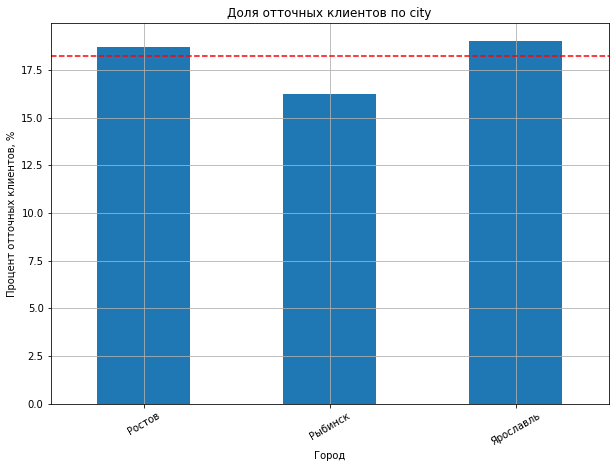

In [28]:
# Вызовем функицю df_category_counts для параметра `city`
df_category_counts(bank_clients, 'city', 'Город')

Доля отточных клиентов в Ростове и Ярославле примерно одинаковая и составляет около 19% от общего числа клиентов из этого города. Эти показатели выше, чем средняя доля оттока по всему банку. Стоит обратить внимание, что клиенты из Ярославля составляют почти 59% всех клиентов банка. Немного ниже доля оттока в Рыбинске, хотя и незначительно. Она составляет 16%.

### Анализ влияния пола на отток клиентов

,gender,total,churn,loyal,total_ratio,churn_ratio
0,Ж,4982,635,4347,49.95,12.75
1,М,4991,1183,3808,50.05,23.70


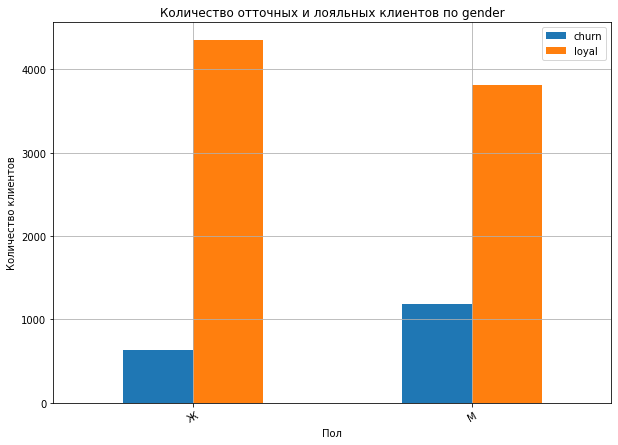

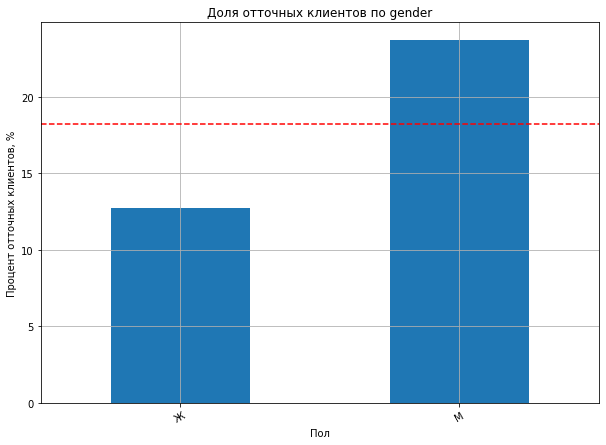

In [29]:
# Вызовем функицю df_category_counts для параметра `gender`
df_category_counts(bank_clients, 'gender', 'Пол')

Исходя из таблицы и графиков видно, что, несмотря на то, что в категории `gender` примерно равное количество мужчин и женщин, доля отточных клиентов среди мужчин значительно выше, чем среди женщин, и составляет 23.7%. Это больше, чем средний уровень оттока по всему банку. 

### Анализ влияния возраста на отток клиентов

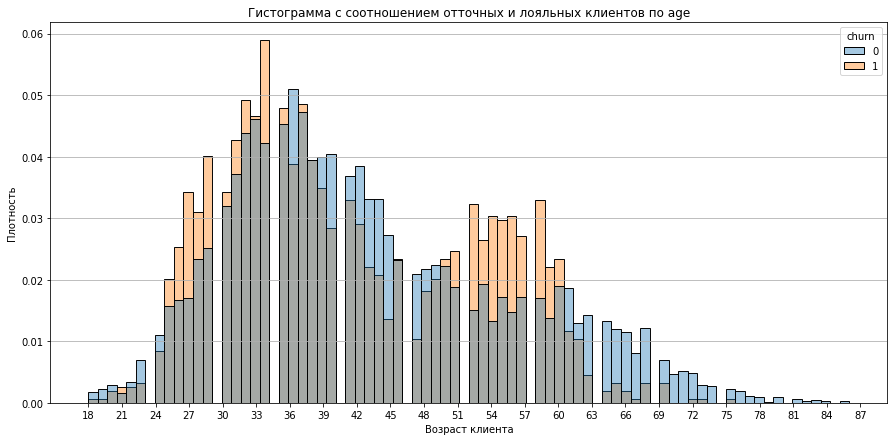

In [30]:
# Вызовем функицю df_category_name_hist для параметра `age`
df_category_name_hist(bank_clients, 'age', 'Возраст клиента')

Заметим интересные для нас возрастные диапазоны: от 25 до 35 и от 50 до 60 лет. Создадим срезы и рассмотрим их более подробно.

In [31]:
# Создадим срезы, в которые попадут клиенты в возрастах от 25 до 35 и от 50 до 60 лет
bank_clients_age_25_35 = bank_clients.query('25 <= age <= 35')
bank_clients_age_50_60 = bank_clients.query('50 <= age <= 60')

Всего клиентов в срезе: 3055
Количество отточных клиентов в срезе: 665
Количество лояльных клиентов в срезе: 2390
Доля отточных клиентов в срезе: 21.77%
Доля клиентов в срезе от общего числа клиентов банка: 30.63%


,age,total,churn,loyal,total_ratio,churn_ratio
0,25,140,31,109,4.58,22.14
1,26,155,39,116,5.07,25.16
2,27,171,53,118,5.60,30.99
3,28,210,48,162,6.87,22.86
4,29,236,62,174,7.73,26.27
5,30,275,53,222,9.00,19.27
6,31,324,66,258,10.61,20.37
7,32,380,76,304,12.44,20.00
8,33,392,72,320,12.83,18.37
9,34,384,91,293,12.57,23.70


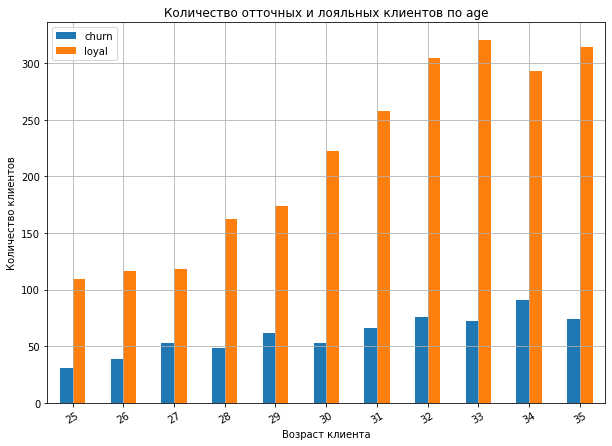

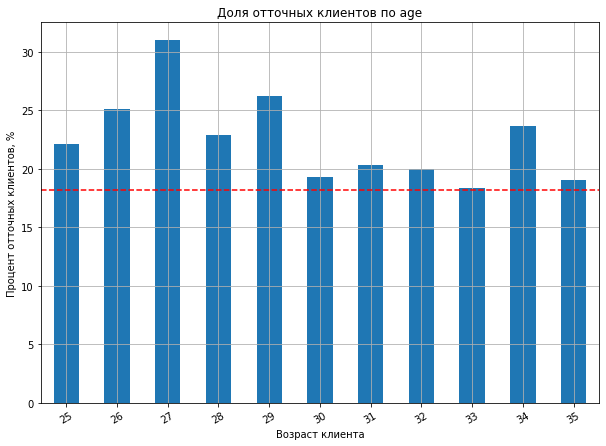

None

In [32]:
# Выведем информацию о срезе с клиентами возратсного диапазона от 25 до 35 лет
query_info(bank_clients_age_25_35)

# Вызовем функицю df_category_counts для среза с возрастным диапазоном от 25 до 35 лет по параметру `age`
display(df_category_counts(bank_clients_age_25_35, 'age', 'Возраст клиента'))

Общая доля отточных клиентов в возрасте от 25 до 35 лет составляет 21.77%, это 30.63% всех клиентов. Уровень оттока выше среднего уровня оттока по банку в каждом возрасте из диапазона. Стоит отметить, что клиентов от 31 до 35 заметно больше, чем клиентов в возрасте от 25 до 30.

Всего клиентов в срезе: 1768
Количество отточных клиентов в срезе: 468
Количество лояльных клиентов в срезе: 1300
Доля отточных клиентов в срезе: 26.47%
Доля клиентов в срезе от общего числа клиентов банка: 17.73%


,age,total,churn,loyal,total_ratio,churn_ratio
0,50,190,36,154,10.75,18.95
1,51,168,38,130,9.50,22.62
2,52,154,50,104,8.71,32.47
3,53,175,41,134,9.90,23.43
4,54,139,47,92,7.86,33.81
5,55,165,46,119,9.33,27.88
6,56,149,47,102,8.43,31.54
7,57,161,42,119,9.11,26.09
8,58,169,51,118,9.56,30.18
9,59,130,34,96,7.35,26.15


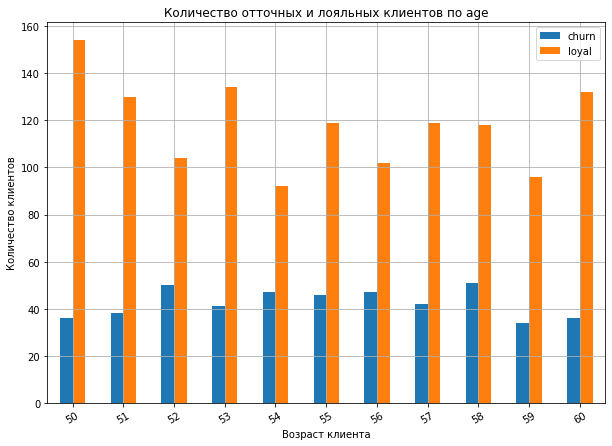

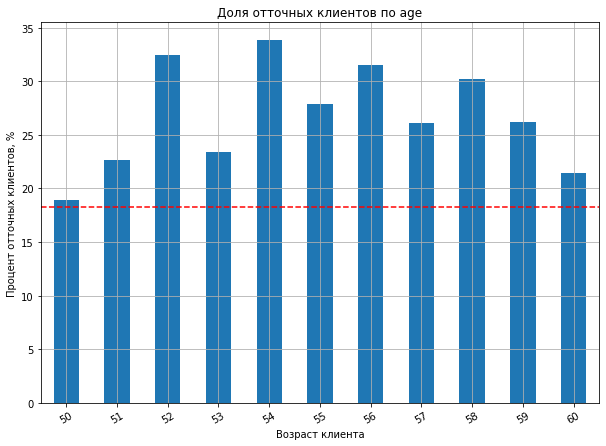

None

In [33]:
# Выведем информацию о срезе с клиентами возратсного диапазона от 50 до 60 лет
query_info(bank_clients_age_50_60)

# Вызовем функицю df_category_counts для среза с возрастным диапазоном от 50 до 60 лет по параметру `age`
display(df_category_counts(bank_clients_age_50_60, 'age', 'Возраст клиента'))

Общая доля отточных клиентов в возрасте от 50 до 60 лет составляет 26.47%, однако это 17.73% всех клиентов банка, почти вдвое меньше, чем клиентов предыдущей возрастной категории. Уровень оттока выше среднего уровня оттока по банку в каждом возрасте из диапазона. Здесь количество клиентов каждого возраста распределилось равномерно.

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️Тут очень хорошо!</div>

### Анализ влияния метрики equity на отток клиентов

,equity,total,churn,loyal,total_ratio,churn_ratio
0,0,2576,90,2486,25.83,3.49
1,1,773,93,680,7.75,12.03
2,2,1051,166,885,10.54,15.79
3,3,1540,321,1219,15.44,20.84
4,4,1847,464,1383,18.52,25.12
5,5,1915,576,1339,19.20,30.08
6,6,161,58,103,1.61,36.02
7,7,80,37,43,0.80,46.25
8,8,17,6,11,0.17,35.29
9,9,13,7,6,0.13,53.85


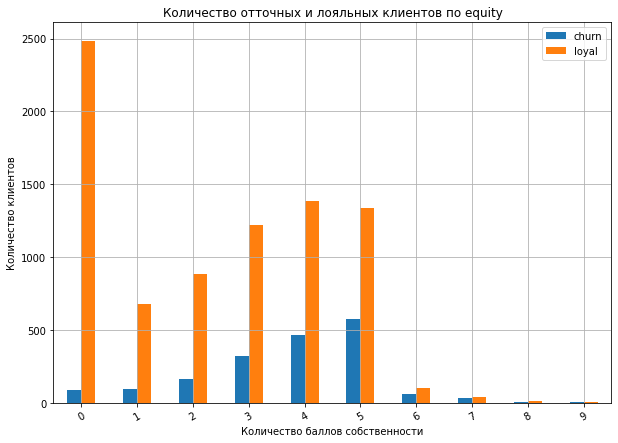

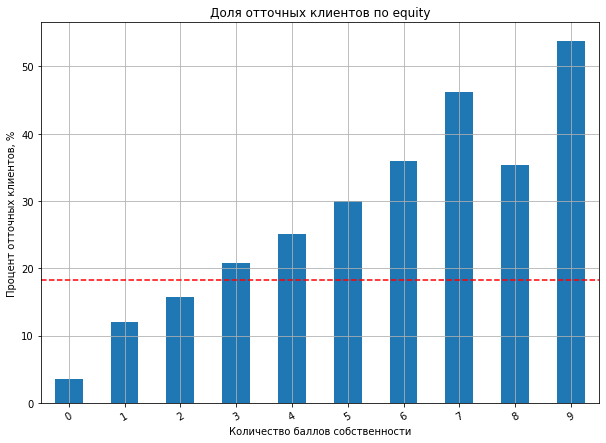

In [34]:
# Вызовем функицю df_category_counts для параметра `equity`
df_category_counts(bank_clients, 'equity', 'Количество баллов собственности')

Анализируя показатель оттока по оценке стоимости имущества, на первый взгляд может показаться, что чем выше уровень оценки, тем выше уровень оттока. Однако стоит обратить внимание на долю клиентов с конкретной оценкой от общего числа клиентов банка. Клиенты с оценками 6, 7, 8, 9 хоть и имеют высокую долю оттока, но их число в каждой подкатегории не превышает 161 человека, поэтому каждый клиент сильно влияет на уровень оттока. 

А вот пользователи с оценками 3, 4, 5 составляют большую долю клиентов банка и имеют показатели оттока выше, чем средний по банку.

### Анализ влияния баланса на счете на отток клиентов

Напомним, что в этом параметре нет значений для почти 23% всех клиентов. Ранее мы выяснили, что пропуски в столбце `balance` имеют клиенты с низким уровнем оценки стоимости имущества (почти всегда это 0), в основном имеющие один продукт от банка и в большинстве случаев это кредитная карта. Почти все клиенты с пропусками в столбце `balance` не собираются уходить из банка.

Мы увидели большое количество выбросов, однако в основном данные располагаются в диапазоне от 0 до 2 млн. у.е.. Поэтому, для более понятного отображения, установим на графике лимит и построим график вручную, без использования ранее построеной функции.

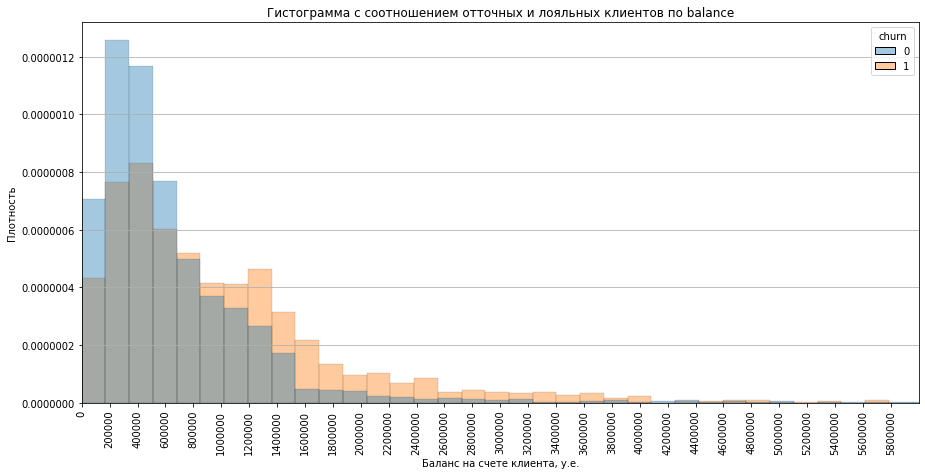

In [35]:
# Зададим размер датафрейма и построим гистограмму с соотношением отточных и лояльных клиентов по category_name
plt.figure(figsize=(15,7))
sns.histplot(data=bank_clients, x='balance', hue='churn', bins=700, alpha=0.4, common_norm=False, stat='density')

# Зададим остальные натсройки графика
plt.title(f"Гистограмма с соотношением отточных и лояльных клиентов по balance")
plt.xlabel(f"Баланс на счете клиента, у.е.")
plt.ylabel(f"Плотность")
plt.grid(axis='y')
plt.xlim(0, 6000000)

# Настроим формат оси Y
formatter = ticker.ScalarFormatter(useMathText=False)
formatter.set_scientific(False)
plt.gca().yaxis.set_major_formatter(formatter)

# Настроим формат оси X
formatter = ticker.ScalarFormatter(useMathText=False)
formatter.set_scientific(False)
plt.gca().xaxis.set_major_formatter(formatter)

# Задаем диапазон и шаг подписей значений оси X
x_min = bank_clients['balance'].min()
x_max = bank_clients['balance'].max()
step = 200000
plt.xticks(np.arange(x_min, 6000000, step), rotation=90)
   
# Выведем полученную гистограмму на экран
plt.show()

По гистограмме видно, что отток превышает лояльных клиентов от баланса приблизительно от 700 тыс. у.е. Рассмотрим этот диапазон более подробно.

In [36]:
# Создадим срез, в который попадут клиенты с балансом от 700 тыс. до 4 млн. у.е.
bank_clinets_balance_700_4000 = bank_clients.query('700000 <= balance <= 4000000')

# Выведем информацию о срезе с клиентами с кредитным рейтингом от 840 до 900
query_info(bank_clinets_balance_700_4000)

Всего клиентов в срезе: 2786
Количество отточных клиентов в срезе: 947
Количество лояльных клиентов в срезе: 1839
Доля отточных клиентов в срезе: 33.99%
Доля клиентов в срезе от общего числа клиентов банка: 27.94%


Получился достаточно весомый срез с почти 28% всех клиентов банка. Уровень оттока клиентов с балансом в диапазоне от 700 тыс. до 4 млн. у.е. составляет 33.99% и значительно превышает средний уровень оттока по всему банку.

### Анализ влияния количества продуктов, которыми пользуется клиент, на отток

,products,total,churn,loyal,total_ratio,churn_ratio
0,1,3323,235,3088,33.32,7.07
1,2,5119,978,4141,51.33,19.11
2,3,1038,297,741,10.41,28.61
3,4,474,300,174,4.75,63.29
4,5,19,8,11,0.19,42.11


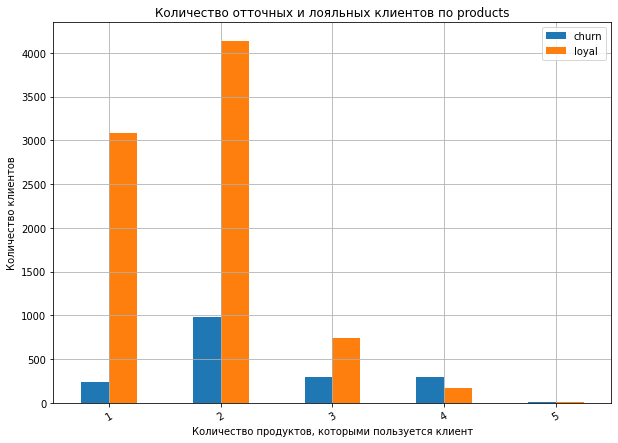

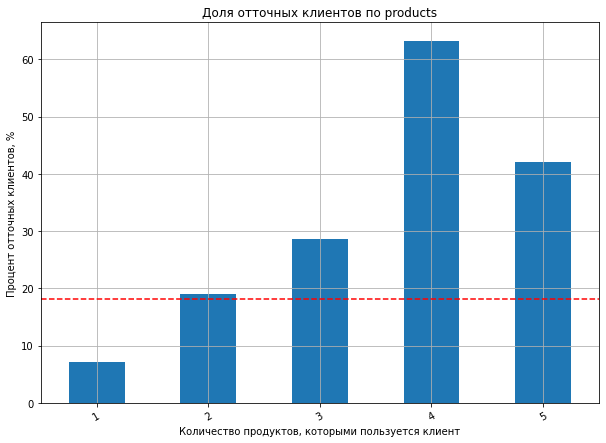

In [37]:
# Вызовем функицю df_category_counts для параметра `products`
df_category_counts(bank_clients, 'products', 'Количество продуктов, которыми пользуется клиент')

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>☀️Еще раз напоминаю, что необходимо поправить графики - подписи осей должны быть на русском языке.
    

<div class="alert alert-info"> 
<b>Комментарий студента:</b> Да, везде подправила! :)

</div>

По графикам мы видим, что, если у клиента количество продуктов два и более, то его уровень оттока становится выше среднего по банку. Однако заметно сильный отток у клиентов с четырьмя (63.29%), пятью (42.11%) и тремя продуктами (28.61%).

### Анализ влияния наличия кредитной карты на отток клиентов
Напомним обозначения: 0 - кредитная карта банка у клиента отсутствует, 1 - клиент имеет кредитную карту банка.

,credit_card,total,churn,loyal,total_ratio,churn_ratio
0,0,3189,815,2374,31.98,25.56
1,1,6784,1003,5781,68.02,14.78


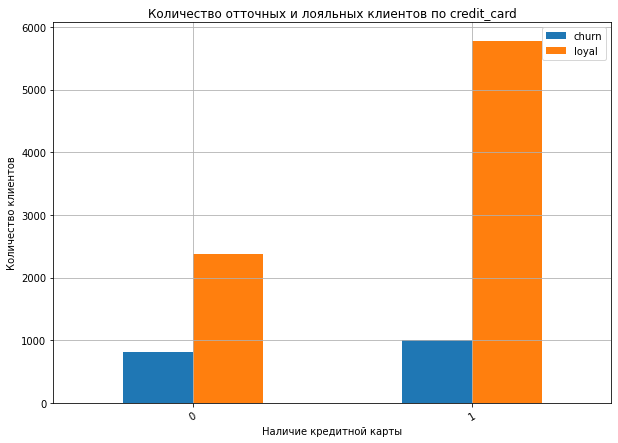

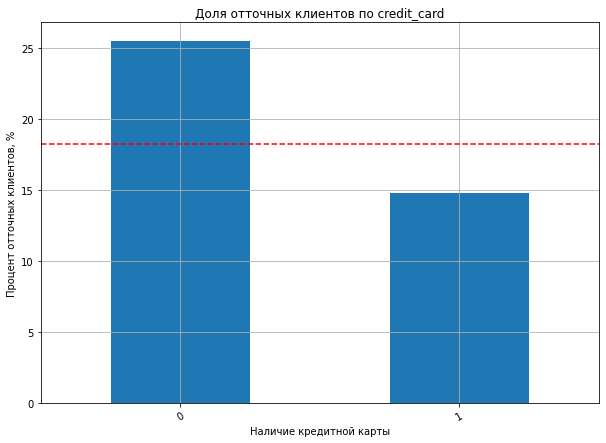

In [38]:
# Вызовем функицю df_category_counts для параметра `credit_card`
df_category_counts(bank_clients, 'credit_card', 'Наличие кредитной карты')

Несмотря на то, что клиентов с кредитной картой банка почти вдвое больше, чем клиентов без нее, уровень оттока клиентов без кредитной карты значительно выше и составляет 25.56%. 

### Анализ влияния показателя активности клиента на отток
Напомним обозначения: 0 - в последние 30 дней клиент не совершал никаких действий с продуктом, 1 - в последние 30 дней клиент совершал какие-то действия и операции с продуктом.

,last_activity,total,churn,loyal,total_ratio,churn_ratio
0,0,4758,541,4217,47.71,11.37
1,1,5215,1277,3938,52.29,24.49


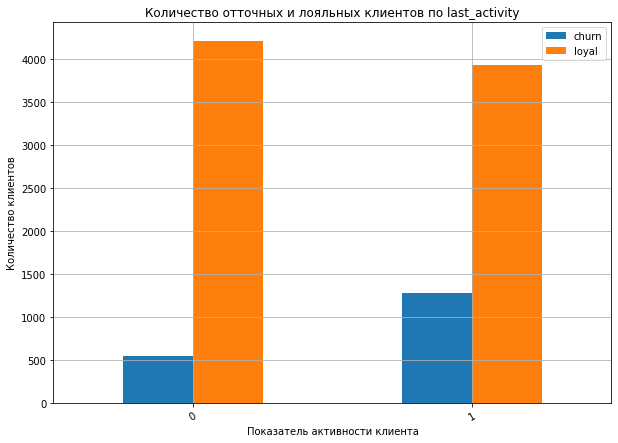

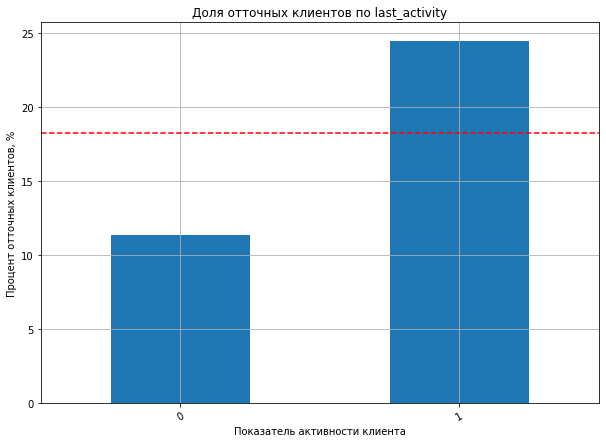

In [39]:
# Вызовем функицю df_category_counts для параметра `last_activity`
df_category_counts(bank_clients, 'last_activity', 'Показатель активности клиента')

Среди неактивных клиентов есть отточные, но они составляют всего 11.37%. Удивительно, но значительную долю клиентов, собирающихся расторгунть договор с банком, составляют активные пользователи, более 24%, что превышает средний уровень оттока по банку.

### Анализ влияния метрики est_salary на отток клиентов
В предобработке данных мы увидели большое количество выбросов, однако в основном данные располагаются в диапазоне до 300 тыс. у.е. Поэтому, для более понятного отображения, установим на графике лимит и построим график вручную, без использования ранее построеной функции.

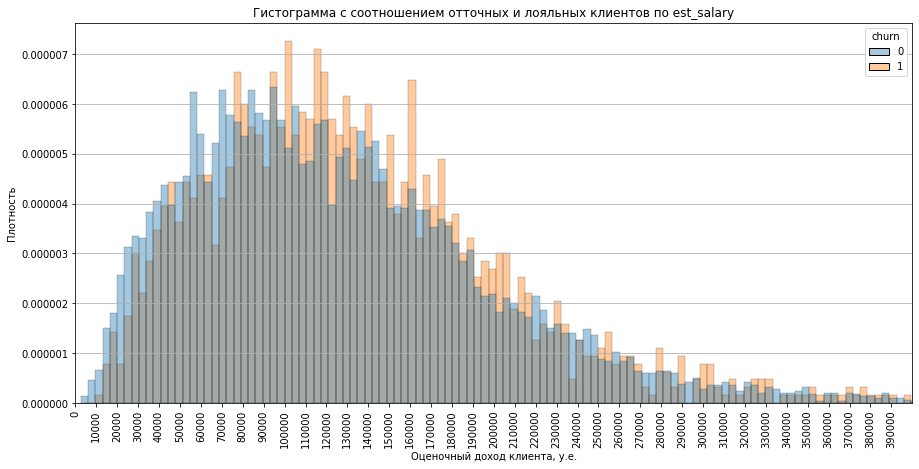

In [40]:
# Зададим размер датафрейма и построим гистограмму с соотношением отточных и лояльных клиентов по category_name
plt.figure(figsize=(15,7))
sns.histplot(data=bank_clients, x='est_salary', hue='churn', bins=400, alpha=0.4, common_norm=False, stat='density')

# Зададим остальные натсройки графика
plt.title(f"Гистограмма с соотношением отточных и лояльных клиентов по est_salary")
plt.xlabel(f"Оценочный доход клиента, у.е.")
plt.ylabel(f"Плотность")
plt.grid(axis='y')
plt.xlim(0, 400000)

# Настроим формат оси Y
formatter = ticker.ScalarFormatter(useMathText=False)
formatter.set_scientific(False)
plt.gca().yaxis.set_major_formatter(formatter)

# Настроим формат оси X
formatter = ticker.ScalarFormatter(useMathText=False)
formatter.set_scientific(False)
plt.gca().xaxis.set_major_formatter(formatter)

# Задаем диапазон и шаг подписей значений оси X
x_min = bank_clients['est_salary'].min()
x_max = bank_clients['est_salary'].max()
step = 10000
plt.xticks(np.arange(0, 400000, step), rotation=90)
   
# Выведем полученную гистограмму на экран
plt.show()

По гистограмме мы видим, что почти на всем диапазоне количество отточных и лояльных клиентов примерно одинаково. Можно отдельно выделить диапазон от 100 до 210 тыс. у.е., где число отточных клиентов превышает количество лояльных, и рассмотреть его подробнее.

In [41]:
# Создадим срез, в который попадут клиенты с балансом от 700 тыс. до 4 млн. у.е.
bank_clinets_est_salary_100_210 = bank_clients.query('100000 <= est_salary <= 210000')

# Выведем информацию о срезе с клиентами с кредитным рейтингом от 840 до 900
query_info(bank_clinets_est_salary_100_210)

Всего клиентов в срезе: 4517
Количество отточных клиентов в срезе: 925
Количество лояльных клиентов в срезе: 3592
Доля отточных клиентов в срезе: 20.48%
Доля клиентов в срезе от общего числа клиентов банка: 45.29%


Это достаточно большой диапазон, составляющий 45% всех клиентов банка. Несмотря на то, что уровень оттока (20.48%) превышает средний уровень оттока по банку, для такого большого диапазона является не критино влияющим. 

### Корреляция параметров с оттоком `churn`

In [42]:
# Создадим цикл, считающий корреляцию столбца и оттока `churn`
for column in bank_clients[['score', 'age','equity', 'balance', 'products', 'credit_card', 'last_activity', 'est_salary', 'city_rostov', 'city_rybinsk', 'city_yaroslavl', 'gender_female', 'gender_male']].columns:
    category_churn_correlation = round(bank_clients[column].corr(bank_clients['churn']), 3)
    print(f"Корреляция между {column} и churn: {category_churn_correlation}")

Корреляция между score и churn: 0.106
Корреляция между age и churn: -0.05
Корреляция между equity и churn: 0.27
Корреляция между balance и churn: 0.086
Корреляция между products и churn: 0.301
Корреляция между credit_card и churn: -0.13
Корреляция между last_activity и churn: 0.17
Корреляция между est_salary и churn: 0.002
Корреляция между city_rostov и churn: 0.005
Корреляция между city_rybinsk и churn: -0.031
Корреляция между city_yaroslavl и churn: 0.024
Корреляция между gender_female и churn: -0.142
Корреляция между gender_male и churn: 0.142


Исходя из расчетов видно, что наибольшая зависимость оттока `churn` связана со столбцами: `products` и `equity`. При формировании сегментов, на них мы обратим внимание в первую очередь. Чуть меньше связь с: `last_activity`, `gender_male`, `gender_female`, `credit_card` и `score`. Наименьшая корреляция оттока `churn`, почти равная нулю, со столбцами `balance`, `age`, `city_rybinsk`, `city_yaroslavl`, `city_rostov` и `est_salary`.

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️Да, тут согласна с тобой.</div>

### Вывод по разделу
Мы провели анализ влияния метрик на отток клиентов и получили следующие параметры с наибольшим уровнем оттока, которые можно использовать при сегментировании:
- клиенты с баллами кредитного скоринга в диапазоне от 840 до 900 (доля оттока - 25.7%, доля от всех клиентов банка - 32.04%);
- по городам уровень оттока не критично большой, однако можно рассмотреть клиентов из Ярославля доля оттока - 19.01%, доля от всех клиентов банка - 58.91%);
- клиенты - мужчины (доля оттока - 23.7%, доля от всех клиентов банка - 50.05%);
- клиенты в возрасте от 25 до 35 лет (доля оттока - 21.77%, доля от всех клиентов банка - 30.63%);
- клиенты в возрасте от 50 до 60 лет (доля оттока - 26.47%, доля от всех клиентов банка - 17.73%);
- клиенты с оценками стоимости имущества 3, 4, 5;
- клиенты с балансом в диапазоне от 700 тыс. до 4 млн. у.е. (доля оттока - 33.99%, доля от всех клиентов банка - 27.94%);
- клиенты с 3, 4 или 5 продуктами банка;
- клиенты без кредитной карты (доля оттока - 25.56%, доля от всех клиентов банка - 31.98%);
- клиент, показывающий активность последние 30 дней (доля оттока - 24.49%, доля от всех клиентов банка - 52.29%);
- уровень дохода клиента не сильно влияет на отток, можно выделить сегмент с заработком от 100 до 210 тыс. у.е., но это очень крупный сегмент, с уровнем оттока почти равным среднему по банку.

Корреляционный анализ метрик с уровнем оттока `churn` показал наиболее сильную связь со столбцами: `products` и `equity`, чуть меньше зависимость с `last_activity`, `gender_male`, `gender_female`, `credit_card` и `score`. Это необходимо учитывать при формировании сегментов.

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️У тебя получились хорошие выводы, с этим невозможно поспорить :)</div>

## Статистический анализ данных

### Проверка гипотезы различия дохода между теми клиентами, которые ушли и теми, которые остались
**Нулевая гипотеза (H0):** Уровень дохода клиентов, которые ушли и уровень дохода клиентов, которые остались, равны.

**Альтернативная гипотеза (H1):** Уровень дохода клиентов, которые ушли и уровень дохода клиентов, которые остались, не равны.

Для проверки гипотезы проведем t-test. В данном случае мы имеем две независимые выборки, поэтому будем использовать метод `scipy.stats.ttest_ind`. Уровень статистической значимости `alpha` зададим 0.05. В первую очередь создадим выборки и проверим их размер.

In [43]:
# Создадим выборки по оттоку `churn` с доходами `est_salary`
bank_clients_churn_0 = bank_clients.query('churn == 0')['est_salary']
bank_clients_churn_1 = bank_clients.query('churn == 1')['est_salary']

# Посчитаем размеры полученных выборок
print(f'Размер выборки с лояльными клиентами: {bank_clients_churn_0.count()}')
print(f'Размер выборки с отточными клиентами: {bank_clients_churn_1.count()}')

Размер выборки с лояльными клиентами: 8155
Размер выборки с отточными клиентами: 1818


Поскольку выборки разного размера, укажем параметр `equal_var=False`.

In [44]:
# Проверим гипотезу, используя метод scipy.stats.ttest_ind, используем параметр equal_var=False, т.к. выборки не равны
# Зададим критический уровень статистической значимости, если p-value окажется меньше него, отвергнем гипотезу
alpha = 0.05

results = st.ttest_ind(bank_clients_churn_0, bank_clients_churn_1, equal_var=False)

print('P-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
    print()
else:
    print('Не получилось отвергнуть нулевую гипотезу')
    print()
    
# Для провекри выведем средние значения проверяемых переменных
print('\033[1m' + f'Проверка' + '\033[0m')
print(f'Средний доход лояльных клиентов: {round((bank_clients_churn_0.mean()), 2)}')
print(f'Средний доход отточных клиентов: {round((bank_clients_churn_1.mean()), 2)}')

P-значение: 0.8354803526840116
Не получилось отвергнуть нулевую гипотезу

Проверка
Средний доход лояльных клиентов: 147674.64
Средний доход отточных клиентов: 148357.48


В результате t-теста мы можем сделать вывод о том, что различия в доходах между клиентами, которые ушли (отточные) и клиентами, которые остались (лояльные) не имеют статистической значимости.

### Проверка гипотезы о различии возраста отточных и лояльных клиентов-мужчин

**Нулевая гипотеза (H0):** Возраст клиентов-мужчин, которые ушли и возраст клиентов-мужчин, которые остались, равны.

**Альтернативная гипотеза (H1):** Возраст клиентов-мужчин, которые ушли и возраст клиентов-мужчин, которые остались, не равны.

Аналогично предыдущей гипотезе, проведем t-test методом `scipy.stats.ttest_ind`. Уровень статистической значимости `alpha` зададим 0.05. Создадим выборки и проверим их размер.

In [45]:
# Создадим выборки по оттоку `churn` с доходами `est_salary`
bank_clients_churn_0 = bank_clients.query('churn == 0 and gender == "М"')['age']
bank_clients_churn_1 = bank_clients.query('churn == 1 and gender == "М"')['age']

# Посчитаем размеры полученных выборок
print(f'Размер выборки с лояльными клиентами: {bank_clients_churn_0.count()}')
print(f'Размер выборки с отточными клиентами: {bank_clients_churn_1.count()}')

Размер выборки с лояльными клиентами: 3808
Размер выборки с отточными клиентами: 1183


Поскольку выборки также разного размера, укажем параметр `equal_var=False`.

In [46]:
# Проверим гипотезу, используя метод scipy.stats.ttest_ind, используем параметр equal_var=False, т.к. выборки не равны
# Зададим критический уровень статистической значимости, если p-value окажется меньше него, отвергнем гипотезу
alpha = 0.05

results = st.ttest_ind(bank_clients_churn_0, bank_clients_churn_1, equal_var=False)

print('P-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
    print()
else:
    print('Не получилось отвергнуть нулевую гипотезу')
    print()
    
# Для провекри выведем средние значения проверяемых переменных
print('\033[1m' + f'Проверка' + '\033[0m')
print(f'Средний возраст лояльных клиентов-мужчин: {round((bank_clients_churn_0.mean()), 2)}')
print(f'Средний возраст отточных клиентов-мужчин: {round((bank_clients_churn_1.mean()), 2)}')

P-значение: 0.30056575423317844
Не получилось отвергнуть нулевую гипотезу

Проверка
Средний возраст лояльных клиентов-мужчин: 40.06
Средний возраст отточных клиентов-мужчин: 40.43


В результате этого тестирования гипотезы мы можем сделать вывод о том, что возраст клиентов-мужчин, которые ушли (отточные) и клиентов-мужчин, которые остались (лояльные) примерно одинаковый, различия не имеют статистической значимости.

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️По блоку проверки гипотез все хорошо. Здорово, что ты обосновала выбор критерия проверки.</div>

## Сегментирование пользователей
На этапе исследовательского анализа данных мы пришли выделили признаки, которые сильнее всего влияют на отток. На основе комбинаций этих признаков мы можем выделить сегменты отточных клиентов. Напомним эти признаки:
- **клиенты с баллами кредитного скоринга в диапазоне от 840 до 900 (доля оттока - 25.7%, доля от всех клиентов банка - 32.04%)**;
- по городам уровень оттока не критично большой, однако можно рассмотреть клиентов из Ярославля доля оттока - 19.01%, доля от всех клиентов банка - 58.91%);
- **клиенты - мужчины (доля оттока - 23.7%, доля от всех клиентов банка - 50.05%)**;
- **клиенты в возрасте от 25 до 35 лет (доля оттока - 21.77%, доля от всех клиентов банка - 30.63%)**;
- клиенты в возрасте от 50 до 60 лет (доля оттока - 26.47%, доля от всех клиентов банка - 17.73%);
- **клиенты с оценками стоимости имущества 3, 4, 5**;
- клиенты с балансом в диапазоне от 700 тыс. до 4 млн. у.е. (доля оттока - 33.99%, доля от всех клиентов банка - 27.94%);
- **клиенты с 3, 4 или 5 продуктами банка**;
- **клиенты без кредитной карты (доля оттока - 25.56%, доля от всех клиентов банка - 31.98%)**;
- клиент, показывающий активность последние 30 дней (доля оттока - 24.49%, доля от всех клиентов банка - 52.29%);
- уровень дохода клиента не сильно влияет на отток, можно выделить сегмент с заработком от 100 до 210 тыс. у.е., но это очень крупный сегмент, с уровнем оттока почти равным среднему по банку.

Корреляционный анализ метрик с уровнем оттока `churn` показал наиболее сильную связь со столбцами: **`products`** и **`equity`**, чуть меньше зависимость с `last_activity`, **`gender_male`**, `gender_female`, **`credit_card`** и **`score`**.

**Требования к сегментам:**
- Число клиентов в сегменте не менее 700 человек.
- Уровень оттока сегмента выше среднего уровня оттока по банку (> 18%).

Жирным шрифтом выделены параметры, которые были использованы при сегментации ниже.

### Сегмент 1
**Описание сегмента:** клиенты без кредитной карты с количеством продуктов банка от 3 до 5.

In [47]:
# Создадим выборку клиентов без кредитной карты с количеством продуктов банка от 3 до 5
bank_clients_segment_1 = bank_clients.query('products == [3, 4, 5] and credit_card == 0')

# Посчитаем параметры для проверки сегмента
query_info(bank_clients_segment_1)

Всего клиентов в срезе: 820
Количество отточных клиентов в срезе: 265
Количество лояльных клиентов в срезе: 555
Доля отточных клиентов в срезе: 32.32%
Доля клиентов в срезе от общего числа клиентов банка: 8.22%


Полученый сегмент соответсвтует требованиям. Доля отточных клиентов в этом сегменте: 32.32%.

### Сегмент 2
**Описание сегмента:** клиенты с кредитным скорингом от 840 до 900 c оценкой имущества 3, 4 или 5.

In [48]:
# Создадим выборку клиентов с кредитным скорингом от 840 до 900 c оценкой имущества 3, 4 или 5
bank_clients_segment_2 = bank_clients.query('840 <= score <= 900 and equity == [3, 4, 5]')

# Посчитаем параметры для проверки сегмента
query_info(bank_clients_segment_2)

Всего клиентов в срезе: 2010
Количество отточных клиентов в срезе: 654
Количество лояльных клиентов в срезе: 1356
Доля отточных клиентов в срезе: 32.54%
Доля клиентов в срезе от общего числа клиентов банка: 20.15%


Полученый сегмент соответсвтует требованиям. Доля отточных клиентов в этом сегменте: 32.54%.

### Сегмент 3
**Описание сегмента:** клиенты-мужчины в возрасте от 25 до 35 лет.

In [49]:
# Создадим выборку клиентов-мужчин в возрасте от 25 до 35 лет
bank_clients_segment_3 = bank_clients.query('gender == "М" and 25 <= age <= 35')

# Посчитаем параметры для проверки сегмента
query_info(bank_clients_segment_3)

Всего клиентов в срезе: 1780
Количество отточных клиентов в срезе: 454
Количество лояльных клиентов в срезе: 1326
Доля отточных клиентов в срезе: 25.51%
Доля клиентов в срезе от общего числа клиентов банка: 17.85%


Полученый сегмент соответсвтует требованиям. Доля отточных клиентов в этом сегменте: 25.51%.

### Визуализация сегментов
Визуализиурем все сегменты на одном графике. Для начала, создадим датафрейм, объединяющий информацию обо всех сегментах.

,segment,total,churn,loyal,churn_ratio,total_ratio
0,Сегмент 1,820,265,555,32.32,8.22
1,Сегмент 2,2010,654,1356,32.54,20.15
2,Сегмент 3,1780,454,1326,25.51,17.85


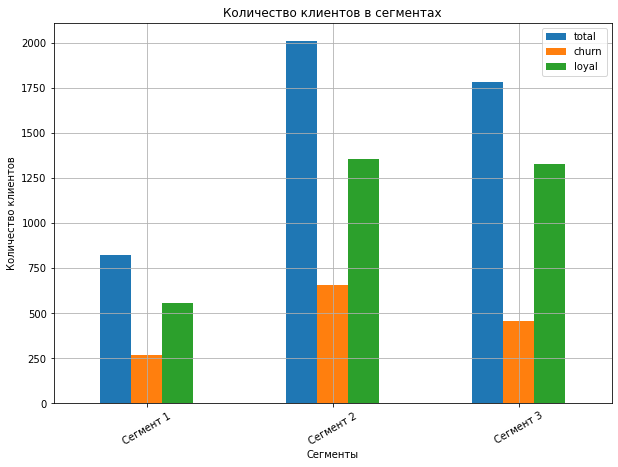

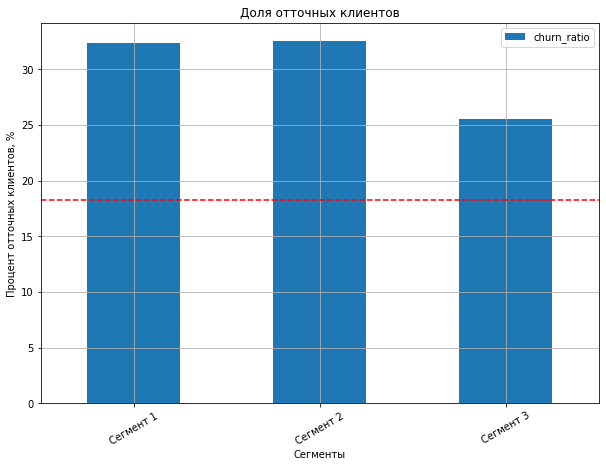

In [50]:
# Создадим общий датафрейм с информацией по сегментам
data = {'segment': ['Сегмент 1', 'Сегмент 2', 'Сегмент 3'],
        'total': [bank_clients_segment_1['churn'].count(),
                  bank_clients_segment_2['churn'].count(),
                  bank_clients_segment_3['churn'].count()],
        'churn': [bank_clients_segment_1['churn'].sum(),
                  bank_clients_segment_2['churn'].sum(),
                  bank_clients_segment_3['churn'].sum()],
        'loyal': [bank_clients_segment_1['churn'].count() - bank_clients_segment_1['churn'].sum(),
                  bank_clients_segment_2['churn'].count() - bank_clients_segment_2['churn'].sum(),
                  bank_clients_segment_3['churn'].count() - bank_clients_segment_3['churn'].sum()],
        'churn_ratio': [round(bank_clients_segment_1['churn'].sum() / bank_clients_segment_1['churn'].count() * 100, 2),
                                   round(bank_clients_segment_2['churn'].sum() / bank_clients_segment_2['churn'].count() * 100, 2),
                                   round(bank_clients_segment_3['churn'].sum() / bank_clients_segment_3['churn'].count() * 100, 2)],
        'total_ratio': [round(bank_clients_segment_1['churn'].count() / bank_clients['churn'].count() * 100, 2),
                                                                    round(bank_clients_segment_2['churn'].count() / bank_clients['churn'].count() * 100, 2),
                                                                    round(bank_clients_segment_3['churn'].count() / bank_clients['churn'].count() * 100, 2)]}
df = pd.DataFrame(data)
display(df)

# Построим диаграмму с общим количеством клиентов в сегменте, числом отточных и лояльных клиентов
df.plot(x='segment', y=['total', 'churn', 'loyal'], kind='bar', figsize=(10, 7))
plt.title(f"Количество клиентов в сегментах")
plt.ylabel(f"Количество клиентов")
plt.xlabel(f"Сегменты")
plt.xticks(rotation=30)
plt.legend()
plt.grid()
plt.show()

# Построим диаграмму с долей отточных клиентов, проведем линию среднего уровня оттока по всему банку
df.plot(x='segment', y='churn_ratio', kind='bar', figsize=(10, 7))
plt.axhline(y=bank_clients['churn'].mean()*100, color='red', linestyle='--')
plt.title(f"Доля отточных клиентов")
plt.ylabel(f"Процент отточных клиентов, %")
plt.xlabel(f"Сегменты")
plt.xticks(rotation=30)
plt.grid()
plt.show()

Таким образом, Сегмент 2 оказался самым большим по объему и с самым высоким уровнем оттока. Самым меньшим оказался Сегемент 1, а уровень оттока меньше всего у Сегмента 3.

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️Все супер, задача выполнена! Молодец :) Отдельное спасибо за визуализацию.</div>

## Вывод и рекомендации

В рамках проекта был проведен анализ данных клиентов "Метанпромбанка".

В первую очерель была выполнена предобработка данных, в ходе которой были переименованы столбцы, изменены типы данных в столбцах, обработаны пропуски и дубликаты, исследованы аномалии и добавлены дополнительные столбцы для дальнейшего исследования.

После провели исследовательский анализ влияния метрик на отток клиентов и получили список параметров с наибольшим уровнем оттока, которые позже использовали при сегментировании. Провели корреляционный анализ всех метрик с оттоком `churn`.

Следующим этапом провели статистический анализ, проверив две гипотезы:
- Гипотеза различия дохода между теми клиентами, которые ушли и теми, которые остались.
- Гипотеза различия возраста отточных и лояльных клиентов-мужчин.

В результате t-тестов обе нулевые гипотезы отвергнуты не были. Различия в доходах между клиентами, которые ушли (отточные) и клиентами, которые остались (лояльные) не имеют статистической значимости, как и возраст отточных и лояльных клиентов-мужчин. Он примерно одинаковый, различия не имеют статистической значимости.

Последним шагом мы выбрали признаки для сегментации отточных пользователей, на основе которых сформировали сегменты:
- Сегмент 1: клиенты без кредитной карты с количеством продуктов банка от 3 до 5.
- Сегмент 2: клиенты с кредитным скорингом от 840 до 900 c оценкой имущества 3, 4 или 5.
- Сегмент 3: клиенты-мужчины в возрасте от 25 до 35 лет.

Сегмент 2 оказался самым большим по объему и с самым высоким уровнем оттока (32.52%). Самым меньшим оказался Сегемент 1 (820 чел.), а уровень оттока меньше всего у Сегмента 3 (25.51%).

**Рекомендации по работе с сегментами:**
1. Для первого сегмента: предложить завести кредитную карту банка с увеличенным беспроцентным периодом.
2. Для второго сегмента: предложить кредитные продукты или продукты страхования собственности, чтобы удержать их в банке.
3. Для третьего сегмента: в этом сегменте преимущественно молодые люди, поэтому можно предложить им категории кэшбэка, покупки в которых совершает клиент, также предложить выгодные условия по ипотеке или автокредиту.

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>☀️Дарья, спасибо тебе за содержательный общий вывод и в целом за весь проект. Все получилось отлично, ты хорошо справилась с задачей, осталось только подправить графики. Отправляю тебе проект, чтобы ты ознакомилась с моими комментариями и оставила свои. Молодец! </div>

<div class="alert alert-info"> 
<b>Комментарий студента:</b> Большое спасибо за ревью! Все ошибки исправила, в презентацию графики вставила новые, с подписями.

</div>


<div class="alert alert-success">
<b>Комментарий ревьюера v2.0:</b>☀️Дарья, спасибо за правки и исправления, внесенные в проект. Сейчас все принято :) Поздравляю тебя ! Желаю успехов на поприще аналитики!</div>